<font color='#614D40'>
<h5>Note:</h5><br>
1. utils.py file contains custom build functions
<ul>
  <li> build_random_model</li>
  <li>plot_confusion_matrix</li>
  <li>get_text_responsecoding</li>
    <li>get_gv_fea_dict</li>
    <li>get_gv_feature</li>
    <li>predict_and_plot_confusion_matrix</li>
    <li>report_log_loss</li>
    
</ul>
2. To plot confusion matrix for model, pass 'show_plot = True' predict_and_plot_confusion_matrix function
<ul>
  <li> e.g. predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf, show_plot = True)</li>
</ul>
</font>

<h2><font color='#40B5C4'> Importing Libraries </font></h2>

In [1]:
#basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns

#regax and stopwords
import re
from nltk.corpus import stopwords

#train test split
from sklearn.model_selection import train_test_split

# performance matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss

#Custom class
from utils import *

#text to vector
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer

#stacking
from scipy.sparse import hstack

#ML algo
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


<h2><font color='#40B5C4'> Loading dataset </font></h2>

In [2]:
data = pd.read_csv('file1.csv')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  5
Features :  ['ID' 'Gene' 'Variation' 'Class' 'TEXT']


,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [3]:
y_true = data['Class'].values
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [4]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h2><font color='#40B5C4'> Building random model(base model) </font></h2>

Log loss on Cross Validation Data using Random Model 2.489576841663928
Log loss on Test Data using Random Model 2.4507532831152243
-------------------- Confusion matrix --------------------


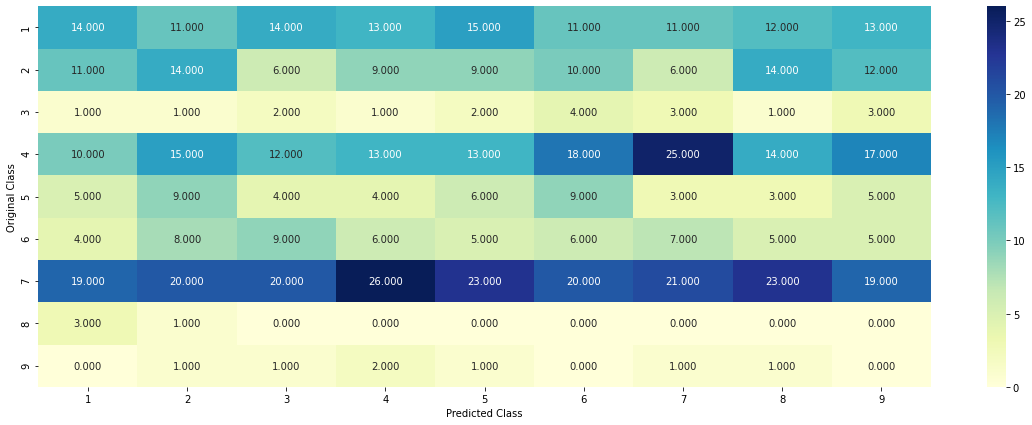

-------------------- Precision matrix (Columm Sum=1) --------------------


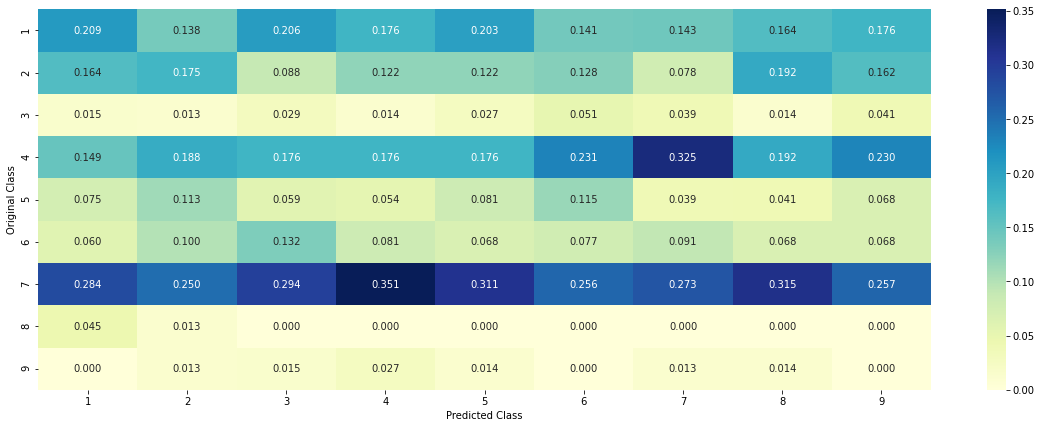

-------------------- Recall matrix (Row sum=1) --------------------


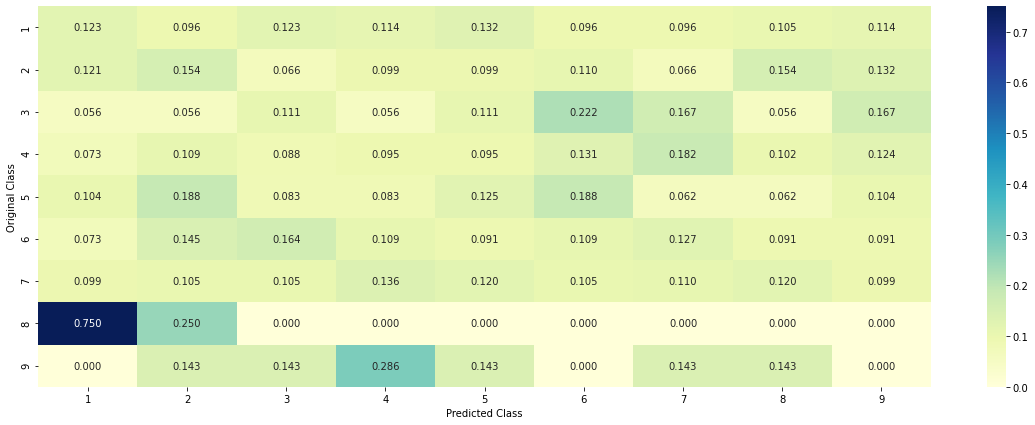

In [5]:
predicted_y = build_random_model(test_df, cv_df, y_cv, y_test)
plot_confusion_matrix(y_test, predicted_y+1)

<h2><font color='#40B5C4'> Data preprocessing </font></h2>

<h4><font color='#BBA036'>Response coding for feature "Gene"</font></h4>

In [6]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [7]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


<h4><font color='#BBA036'>TfIdf(or on hot encoded vector) for feature "Gene"</font></h4>

In [8]:
# one-hot encoding of Gene feature.
gene_vectorizer = TfidfVectorizer(max_features=1000)
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [9]:
print("train_gene_feature_onehotCoding is converted feature using the one-hot encoding method. The shape of Gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using the one-hot encoding method. The shape of Gene feature: (2124, 226)


<h4><font color='#BBA036'>Response coding for feature "Variation"</font></h4>

In [10]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [11]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


<h4><font color='#BBA036'>TfIdf(or on hot encoded vector) for feature "Variation"</font></h4>

In [12]:
# one-hot encoding of variation feature.
variation_vectorizer = TfidfVectorizer(max_features=1000)
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [13]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1000)


<h4><font color='#BBA036'>Response coding for feature "TEXT"</font></h4>

In [14]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df, "TEXT", "Class", 9)
test_text_feature_responseCoding  = get_text_responsecoding(test_df, "TEXT", "Class", 9)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df, "TEXT", "Class", 9)

In [15]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

<h4><font color='#BBA036'>TfIdf(or on hot encoded vector) for feature "TEXT"</font></h4>

In [16]:
#tfidf text to vector
vectorizer = TfidfVectorizer(max_features=1000)
train_text_feature_tfidf = vectorizer.fit_transform(train_df['TEXT'])

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
tfidf_fea_counts = train_text_feature_tfidf.sum(axis=0).A1

# getting all the feature names (words)
tfidf_features= vectorizer.get_feature_names()

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
tfidf_fea_dict = dict(zip(list(tfidf_features),tfidf_fea_counts))

#sort dictionary by value
#https://stackoverflow.com/a/2258273/4084039
sorted_tfidf_fea_dict = dict(sorted(tfidf_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_tfidf_text_occur = np.array(list(sorted_tfidf_fea_dict.values()))


<h4><font color='#BBA036'>Normalizing one hot encoded feature "TEXT" </font></h4>

In [17]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_tfidf, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

<h1><center><font color='#BBA036'>Stacking the three types of features</font></center></h1>

In [18]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


<h2><font color='#40B5C4'>Machine Learning Models </font></h2>

In [19]:
#list to store some records for final summary
Model_name = []
train_losses_list = []
cv_losses_list = []
test_losses_list = []
misclassified_percentage= []

<h3><font color='#235DA3'>Naive Bayas (with one hot encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-05
Log Loss : 1.2492261791202235
for alpha = 0.0001
Log Loss : 1.246382380115649
for alpha = 0.001
Log Loss : 1.2434222445069782
for alpha = 0.1
Log Loss : 1.2624760115825833
for alpha = 1
Log Loss : 1.2966619788869838
for alpha = 10
Log Loss : 1.4590856538781627
for alpha = 100
Log Loss : 1.4660236175947445
for alpha = 1000
Log Loss : 1.458200525096541


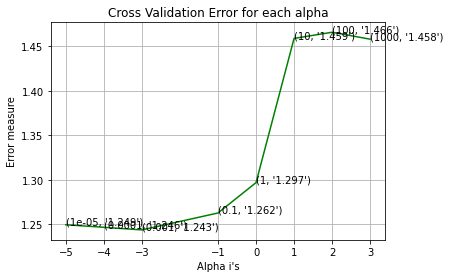

For values of best alpha =  0.001 The train log loss is: 0.720525179963521
For values of best alpha =  0.001 The cross validation log loss is: 1.2434222445069782
For values of best alpha =  0.001 The test log loss is: 1.1823933397465283


In [20]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
naive_tr_loss = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",naive_tr_loss)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
naive_cv_loss = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",naive_cv_loss)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
naive_te_loss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",naive_te_loss)

#For Summary
Model_name.append("MultinomialNB-OHE")
train_losses_list.append(naive_tr_loss)
cv_losses_list.append(naive_cv_loss)
test_losses_list.append(naive_te_loss)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [21]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
missclassified_p =  np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0]
misclassified_percentage.append(missclassified_p*100)
print("Number of missclassified point :",missclassified_p)
# plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

Log Loss : 1.2434222445069782
Number of missclassified point : 0.40789473684210525


<h3><font color='#235DA3'>Naive Bayas (with response coding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-05
Log Loss : 1.3468991454327692
for alpha = 0.0001
Log Loss : 1.3469074357073203
for alpha = 0.001
Log Loss : 1.3469905726543046
for alpha = 0.1
Log Loss : 1.3576807474518584
for alpha = 1
Log Loss : 1.412095268237589
for alpha = 10
Log Loss : 1.3814404018153215
for alpha = 100
Log Loss : 1.357118842109623
for alpha = 1000
Log Loss : 1.3393617927764851


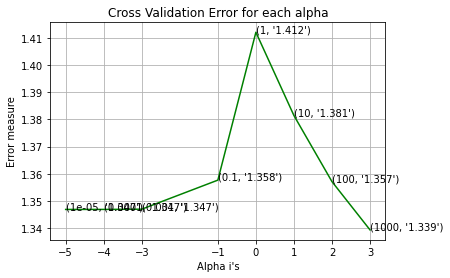

For values of best alpha =  1000 The train log loss is: 1.215469506283023
For values of best alpha =  1000 The cross validation log loss is: 1.3393617927764851
For values of best alpha =  1000 The test log loss is: 1.3016295878907485


In [22]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_responseCoding)
naive_tr_loss = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",naive_tr_loss)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
naive_cv_loss = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",naive_cv_loss)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
naive_te_loss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",naive_te_loss)

#For Summary
Model_name.append("MultinomialNB-RC")
train_losses_list.append(naive_tr_loss)
cv_losses_list.append(naive_cv_loss)
test_losses_list.append(naive_te_loss)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [23]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
missclassified_p =  np.count_nonzero((sig_clf.predict(cv_x_responseCoding)- cv_y))/cv_y.shape[0]
misclassified_percentage.append(missclassified_p*100)
print("Number of missclassified point :",missclassified_p)
# plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_responseCoding))

Log Loss : 1.3393617927764851
Number of missclassified point : 0.37593984962406013


<h3><font color='#235DA3'>K Nearest Neighbour Classification(with one hot encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 5
Log Loss : 1.184582859191366
for alpha = 11
Log Loss : 1.208956006172174
for alpha = 15
Log Loss : 1.2213716368974605
for alpha = 21
Log Loss : 1.2250769066967147
for alpha = 31
Log Loss : 1.2408858278889126
for alpha = 41
Log Loss : 1.2593391050735832
for alpha = 51
Log Loss : 1.277130234898808
for alpha = 99
Log Loss : 1.321711532224953


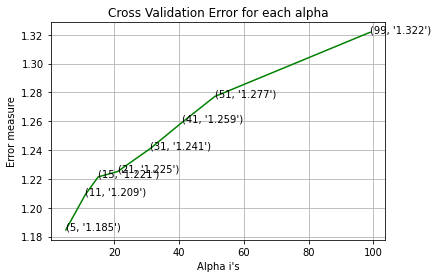

For values of best alpha =  5 The train log loss is: 0.869670345012359
For values of best alpha =  5 The cross validation log loss is: 1.184582859191366
For values of best alpha =  5 The test log loss is: 1.1095752881385874


In [24]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
knn_tr_loss = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",knn_tr_loss)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
knn_cv_loss = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",knn_cv_loss)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
knn_te_loss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",knn_te_loss)

#For Summary
Model_name.append("KNN-OHE")
train_losses_list.append(knn_tr_loss)
cv_losses_list.append(knn_cv_loss)
test_losses_list.append(knn_te_loss)

Log loss : 1.184582859191366
Number of mis-classified points : 0.4116541353383459
-------------------- Confusion matrix --------------------


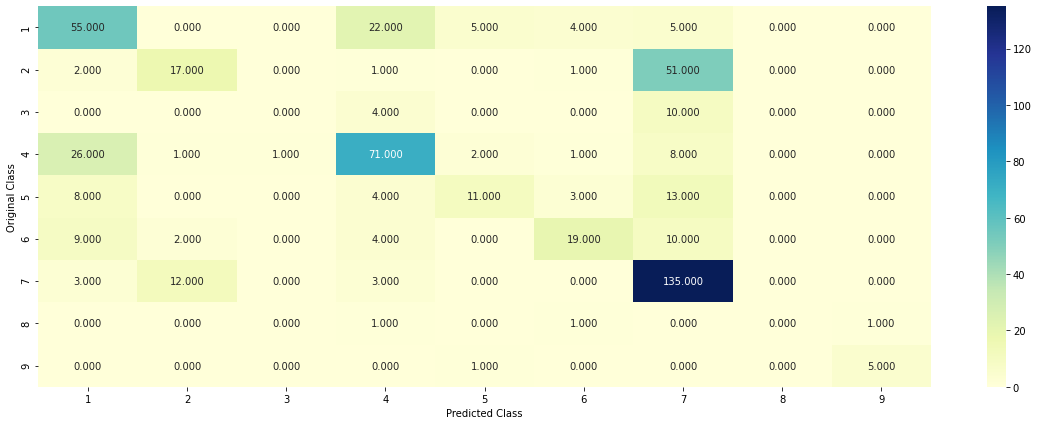

-------------------- Precision matrix (Columm Sum=1) --------------------


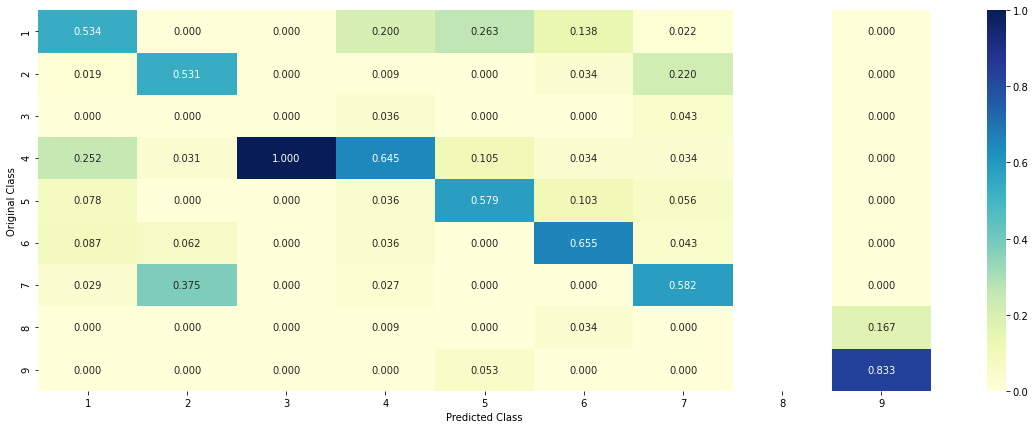

-------------------- Recall matrix (Row sum=1) --------------------


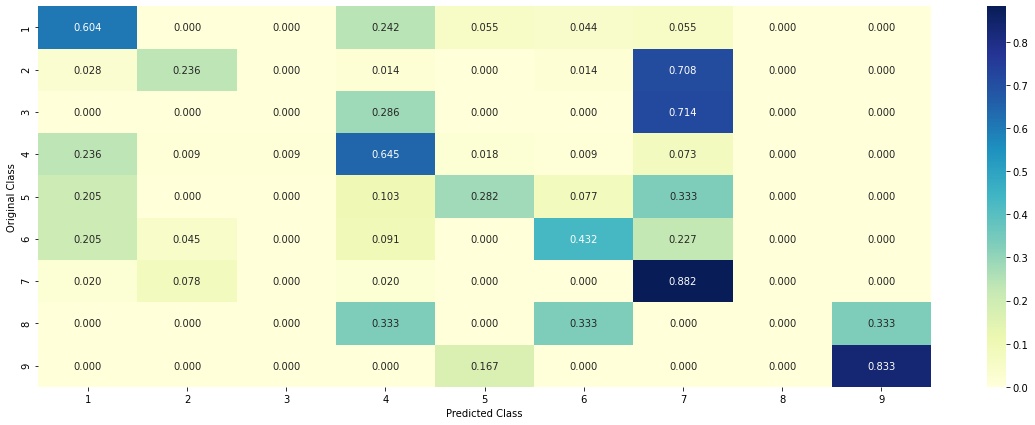

In [25]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf, show_plot = True)
misclassified_percentage.append(missclassified_p*100)

<h3><font color='#235DA3'>K Nearest Neighbour Classification(with response coding)</font></h3>

for alpha = 5
Log Loss : 0.8303678255869867
for alpha = 11
Log Loss : 0.835957236076841
for alpha = 15
Log Loss : 0.8578974440857201
for alpha = 21
Log Loss : 0.8876494100065138
for alpha = 31
Log Loss : 0.9334967971345627
for alpha = 41
Log Loss : 0.9480348999579
for alpha = 51
Log Loss : 0.9799301985072221
for alpha = 99
Log Loss : 1.0404936284741573


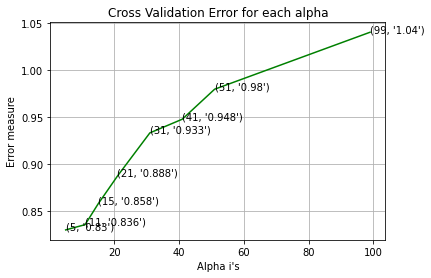

For values of best alpha =  5 The train log loss is: 0.44988832654368194
For values of best alpha =  5 The cross validation log loss is: 0.8303678255869867
For values of best alpha =  5 The test log loss is: 0.8981625788478541


In [26]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
knn_tr_loss = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",knn_tr_loss)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
knn_cv_loss = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",knn_cv_loss)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
knn_te_loss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",knn_te_loss)

#For Summary
Model_name.append("KNN-RC")
train_losses_list.append(knn_tr_loss)
cv_losses_list.append(knn_cv_loss)
test_losses_list.append(knn_te_loss)

In [27]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)
misclassified_percentage.append(missclassified_p*100)


Log loss : 0.8303678255869867
Number of mis-classified points : 0.2744360902255639


<h3><font color='#235DA3'>Logistic Regression (with one hot encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-06
Log Loss : 1.322643778723094
for alpha = 1e-05
Log Loss : 1.2007212355329657
for alpha = 0.0001
Log Loss : 1.097642355066105
for alpha = 0.001
Log Loss : 1.1649881264328514
for alpha = 0.01
Log Loss : 1.3756270706586762
for alpha = 0.1
Log Loss : 1.6474119343895677
for alpha = 1
Log Loss : 1.7637519657141238
for alpha = 10
Log Loss : 1.780903413840314
for alpha = 100
Log Loss : 1.7828718366847645


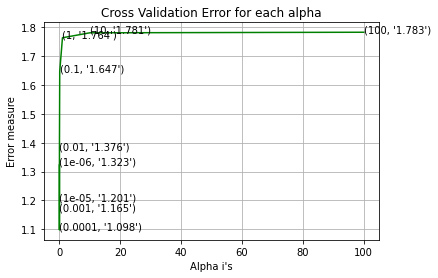

For values of best alpha =  0.0001 The train log loss is: 0.5186986413098328
For values of best alpha =  0.0001 The cross validation log loss is: 1.097642355066105
For values of best alpha =  0.0001 The test log loss is: 1.0518548636453446


In [28]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
LR_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:", LR_tr)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
LR_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:", LR_cv)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
LR_test = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", LR_test)

#For Summary
Model_name.append("Logistic Regresion-OHE")
train_losses_list.append(LR_tr)
cv_losses_list.append(LR_cv)
test_losses_list.append(LR_test)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [29]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 1.097642355066105
Number of mis-classified points : 0.39285714285714285


<h3><font color='#235DA3'>Logistic Regression (with response coding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-06
Log Loss : 0.41499723816018796
for alpha = 1e-05
Log Loss : 0.6624288104042373
for alpha = 0.0001
Log Loss : 0.9259494375972892
for alpha = 0.001
Log Loss : 1.1816216879913808
for alpha = 0.01
Log Loss : 1.3089364580886929
for alpha = 0.1
Log Loss : 1.3526860346510055
for alpha = 1
Log Loss : 1.3555418254763956
for alpha = 10
Log Loss : 1.499932154652292
for alpha = 100
Log Loss : 1.5387834419242181


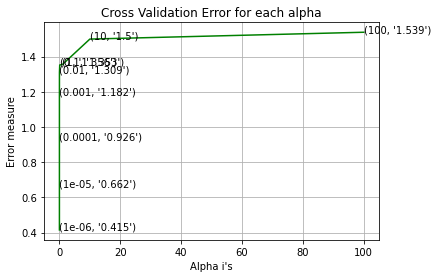

For values of best alpha =  1e-06 The train log loss is: 0.36223411973640024
For values of best alpha =  1e-06 The cross validation log loss is: 0.41499723816018796
For values of best alpha =  1e-06 The test log loss is: 0.8689480484118205


In [30]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
LR_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:", LR_tr)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
LR_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:", LR_cv)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
LR_test = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", LR_test)

#For Summary
Model_name.append("Logistic Regresion-RC")
train_losses_list.append(LR_tr)
cv_losses_list.append(LR_cv)
test_losses_list.append(LR_test)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [31]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.41499723816018796
Number of mis-classified points : 0.08834586466165413


<h3><font color='#235DA3'>Linear Support Vector Machines (with one hot encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for C = 1e-05
Log Loss : 1.270105039210855
for C = 0.0001
Log Loss : 1.2125159689534784
for C = 0.001
Log Loss : 1.142988497999226
for C = 0.01
Log Loss : 1.3899744741363205
for C = 0.1
Log Loss : 1.7040170749143113
for C = 1
Log Loss : 1.7833397119318113
for C = 10
Log Loss : 1.7833395994497026
for C = 100
Log Loss : 1.7833870573741637


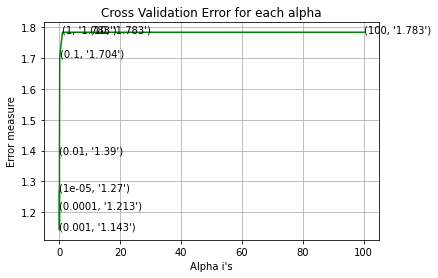

For values of best alpha =  0.001 The train log loss is: 0.7146667191035863
For values of best alpha =  0.001 The cross validation log loss is: 1.142988497999226
For values of best alpha =  0.001 The test log loss is: 1.1229191964475767


In [32]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
SVM_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",SVM_tr)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
SVM_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",SVM_cv)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
SVM_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", SVM_te)
#For Summary
Model_name.append("SVM-OHE")
train_losses_list.append(SVM_tr)
cv_losses_list.append(SVM_cv)
test_losses_list.append(SVM_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters</font></h4>

In [33]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 1.142988497999226
Number of mis-classified points : 0.37406015037593987


<h3><font color='#235DA3'>Linear Support Vector Machines (with response)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for C = 1e-05
Log Loss : 0.5880076580091887
for C = 0.0001
Log Loss : 0.7571060290224673
for C = 0.001
Log Loss : 0.9398936698123445
for C = 0.01
Log Loss : 1.0394694763632202
for C = 0.1
Log Loss : 1.0645438703547496
for C = 1
Log Loss : 1.0460523705012903
for C = 10
Log Loss : 1.3025342337759038
for C = 100
Log Loss : 1.570536553394909


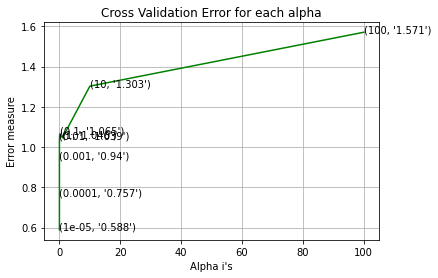

For values of best alpha =  1e-05 The train log loss is: 0.5162932763750806
For values of best alpha =  1e-05 The cross validation log loss is: 0.5880076580091887
For values of best alpha =  1e-05 The test log loss is: 0.9274322116733261


In [34]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
SVM_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",SVM_tr)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
SVM_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",SVM_cv)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
SVM_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", SVM_te)
#For Summary
Model_name.append("Linear SVM-RC")
train_losses_list.append(SVM_tr)
cv_losses_list.append(SVM_cv)
test_losses_list.append(SVM_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters</font></h4>

In [35]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.5880076580091887
Number of mis-classified points : 0.18421052631578946


<h3><font color='#235DA3'>Random Forest Classifier(With One hot Encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

In [36]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
RF_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",RF_tr)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
RF_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",RF_cv)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
RF_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",RF_te)

#For Summary
Model_name.append("Randpm Forest-OHE")
train_losses_list.append(RF_tr)
cv_losses_list.append(RF_cv)
test_losses_list.append(RF_te)

for n_estimators = 100 and max depth =  5
Log Loss : 1.2266083891228434
for n_estimators = 100 and max depth =  10
Log Loss : 1.2495861444771026
for n_estimators = 200 and max depth =  5
Log Loss : 1.2236633868985838
for n_estimators = 200 and max depth =  10
Log Loss : 1.240188579942782
for n_estimators = 500 and max depth =  5
Log Loss : 1.2140955111242997
for n_estimators = 500 and max depth =  10
Log Loss : 1.2347348390098394
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2098831757280595
for n_estimators = 1000 and max depth =  10
Log Loss : 1.2318581164900735
for n_estimators = 2000 and max depth =  5
Log Loss : 1.207442579833893
for n_estimators = 2000 and max depth =  10
Log Loss : 1.2319818682883297
For values of best estimator =  2000 The train log loss is: 0.8280165986311896
For values of best estimator =  2000 The cross validation log loss is: 1.2074425798338928
For values of best estimator =  2000 The test log loss is: 1.1648929904422878


<h4><font color='#82ADCB'>Testing model with best hyper parameters (One Hot Encoding)</font></h4>

In [37]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 1.2074425798338928
Number of mis-classified points : 0.4398496240601504


<h3><font color='#235DA3'>Random Forest Classifier(With response coding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

In [38]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
RF_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",RF_tr)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
RF_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",RF_cv)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
RF_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",RF_te)

#For Summary
Model_name.append("Randpm Forest-RC")
train_losses_list.append(RF_tr)
cv_losses_list.append(RF_cv)
test_losses_list.append(RF_te)

for n_estimators = 100 and max depth =  5
Log Loss : 0.07217150853400421
for n_estimators = 100 and max depth =  10
Log Loss : 0.0527828494984911
for n_estimators = 200 and max depth =  5
Log Loss : 0.06877683528623176
for n_estimators = 200 and max depth =  10
Log Loss : 0.05096994889714531
for n_estimators = 500 and max depth =  5
Log Loss : 0.06654524825846345
for n_estimators = 500 and max depth =  10
Log Loss : 0.04942381177968282
for n_estimators = 1000 and max depth =  5
Log Loss : 0.06727800497488683
for n_estimators = 1000 and max depth =  10
Log Loss : 0.04911112416188997
for n_estimators = 2000 and max depth =  5
Log Loss : 0.06750733106064687
for n_estimators = 2000 and max depth =  10
Log Loss : 0.048943843637187595
For values of best estimator =  2000 The train log loss is: 0.037959836400441746
For values of best estimator =  2000 The cross validation log loss is: 0.048943843637187595
For values of best estimator =  2000 The test log loss is: 0.07169680284496158


<h4><font color='#82ADCB'>Testing model with best hyper parameters (One Hot Encoding)</font></h4>

Log loss : 0.0489438436371876
Number of mis-classified points : 0.0018796992481203006
-------------------- Confusion matrix --------------------


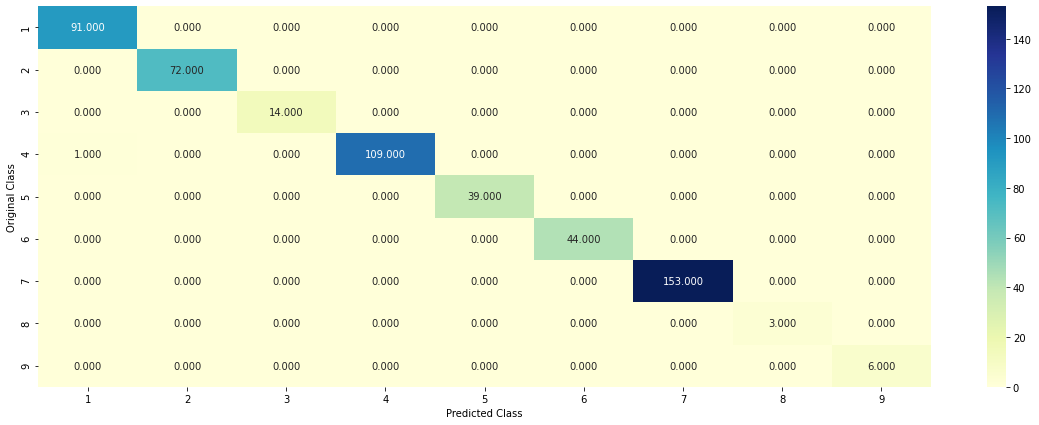

-------------------- Precision matrix (Columm Sum=1) --------------------


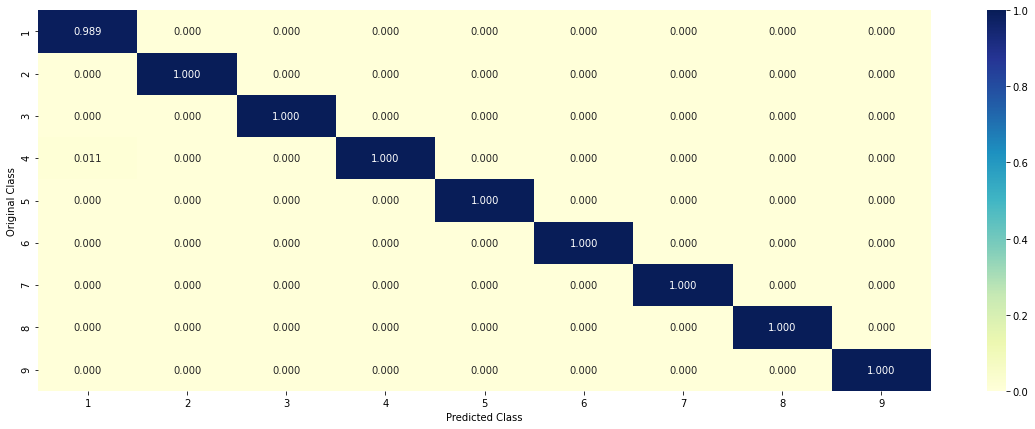

-------------------- Recall matrix (Row sum=1) --------------------


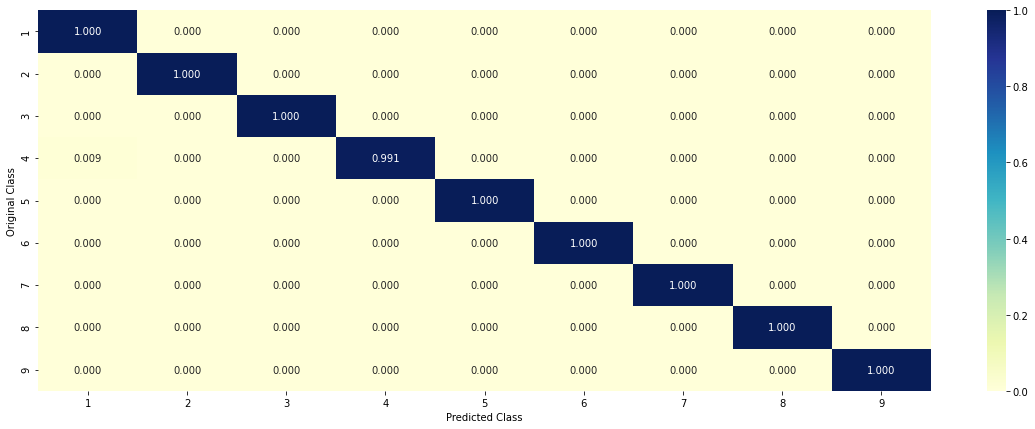

In [39]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf, 1)
misclassified_percentage.append(missclassified_p*100)

# With class balancing

<h3><font color='#235DA3'>Logistic Regression (with one hot encoding)</font></h3>

In [40]:
from sklearn.linear_model import SGDClassifier

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-06
Log Loss : 1.313006201905634
for alpha = 1e-05
Log Loss : 1.175933144538953
for alpha = 0.0001
Log Loss : 1.0746077439549704
for alpha = 0.001
Log Loss : 1.0867602919445816
for alpha = 0.01
Log Loss : 1.231862146772972
for alpha = 0.1
Log Loss : 1.6191906563285532
for alpha = 1
Log Loss : 1.7493829936189838
for alpha = 10
Log Loss : 1.7646837706348046
for alpha = 100
Log Loss : 1.7663278813659256


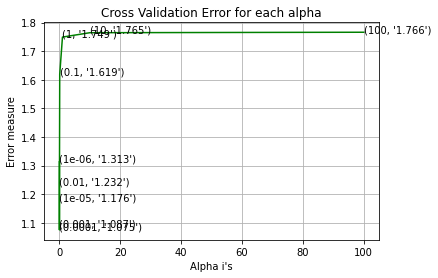

For values of best alpha =  0.0001 The train log loss is: 0.5284710322984905
For values of best alpha =  0.0001 The cross validation log loss is: 1.0746077439549704
For values of best alpha =  0.0001 The test log loss is: 1.0340004986574403


In [41]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
LR_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:", LR_tr)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
LR_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:", LR_cv)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
LR_test = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", LR_test)

#For Summary
Model_name.append("Logistic Regresion-OHE (with class_balancing)")
train_losses_list.append(LR_tr)
cv_losses_list.append(LR_cv)
test_losses_list.append(LR_test)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [42]:
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 1.0746077439549704
Number of mis-classified points : 0.3890977443609023


<h3><font color='#235DA3'>Logistic Regression (with response coding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-06
Log Loss : 0.42152006406838033
for alpha = 1e-05
Log Loss : 0.6592568970458048
for alpha = 0.0001
Log Loss : 0.9350749894580658
for alpha = 0.001
Log Loss : 1.1924944373687016
for alpha = 0.01
Log Loss : 1.303324985737846
for alpha = 0.1
Log Loss : 1.322086174063522
for alpha = 1
Log Loss : 1.391845603814558
for alpha = 10
Log Loss : 1.616297994133888
for alpha = 100
Log Loss : 1.6269442804138587


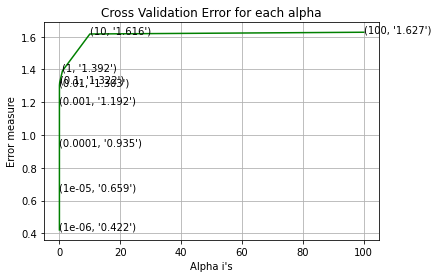

For values of best alpha =  1e-06 The train log loss is: 0.37234539504715725
For values of best alpha =  1e-06 The cross validation log loss is: 0.42152006406838033
For values of best alpha =  1e-06 The test log loss is: 0.8879096110904885


In [43]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
LR_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:", LR_tr)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
LR_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:", LR_cv)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
LR_test = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", LR_test)

#For Summary
Model_name.append("Logistic Regresion-RC (with class_balancing)")
train_losses_list.append(LR_tr)
cv_losses_list.append(LR_cv)
test_losses_list.append(LR_test)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [44]:
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.42152006406838033
Number of mis-classified points : 0.09210526315789473


<h3><font color='#235DA3'>Linear Support Vector Machines (with one hot encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for C = 1e-05
Log Loss : 1.272600510435589
for C = 0.0001
Log Loss : 1.2207854694301423
for C = 0.001
Log Loss : 1.196432583347318
for C = 0.01
Log Loss : 1.4584653608530862
for C = 0.1
Log Loss : 1.6200969198658046
for C = 1
Log Loss : 1.7666562529409005
for C = 10
Log Loss : 1.7666562047273269
for C = 100
Log Loss : 1.766656202660748


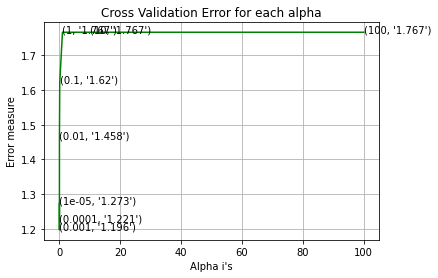

For values of best alpha =  0.001 The train log loss is: 0.8019247104133768
For values of best alpha =  0.001 The cross validation log loss is: 1.196432583347318
For values of best alpha =  0.001 The test log loss is: 1.1897009649771033


In [45]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
SVM_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",SVM_tr)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
SVM_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",SVM_cv)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
SVM_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", SVM_te)
#For Summary
Model_name.append("SVM-OHE (with class_balancing)")
train_losses_list.append(SVM_tr)
cv_losses_list.append(SVM_cv)
test_losses_list.append(SVM_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters</font></h4>

In [46]:
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 1.196432583347318
Number of mis-classified points : 0.3966165413533835


<h3><font color='#235DA3'>Linear Support Vector Machines (with response)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for C = 1e-05
Log Loss : 0.5880076580091887
for C = 0.0001
Log Loss : 0.7571060290224673
for C = 0.001
Log Loss : 0.9398936698123445
for C = 0.01
Log Loss : 1.0394694763632202
for C = 0.1
Log Loss : 1.0645438703547496
for C = 1
Log Loss : 1.0460523705012903
for C = 10
Log Loss : 1.3025342337759038
for C = 100
Log Loss : 1.570536553394909


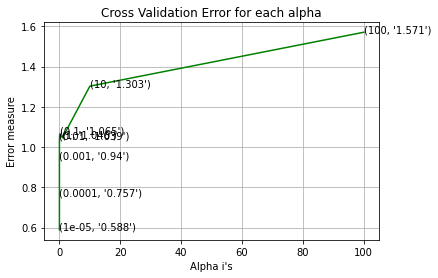

For values of best alpha =  1e-05 The train log loss is: 0.5162932763750806
For values of best alpha =  1e-05 The cross validation log loss is: 0.5880076580091887
For values of best alpha =  1e-05 The test log loss is: 0.9274322116733261


In [47]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
SVM_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",SVM_tr)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
SVM_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",SVM_cv)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
SVM_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", SVM_te)
#For Summary
Model_name.append("Linear SVM-RC (with class_balancing)")
train_losses_list.append(SVM_tr)
cv_losses_list.append(SVM_cv)
test_losses_list.append(SVM_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters</font></h4>

In [48]:
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.5903759780035003
Number of mis-classified points : 0.17669172932330826


In [49]:
from sklearn.ensemble import RandomForestClassifier

<h3><font color='#235DA3'>Random Forest Classifier(With One hot Encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

In [50]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
# cls_weight = {1:1/9, 2:1/9, 3:1/9, 4:1/9, 5:1/9, 6:1/9, 7:1/9, 8:1/9, 9:1/9}
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1, class_weight='balanced')
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
RF_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",RF_tr)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
RF_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",RF_cv)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
RF_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",RF_te)

#For Summary
Model_name.append("Randpm Forest-OHE (with class_balancing)")
train_losses_list.append(RF_tr)
cv_losses_list.append(RF_cv)
test_losses_list.append(RF_te)

for n_estimators = 100 and max depth =  5
Log Loss : 1.3291070566995502
for n_estimators = 100 and max depth =  10
Log Loss : 1.3271788319309008
for n_estimators = 200 and max depth =  5
Log Loss : 1.3180644318222545
for n_estimators = 200 and max depth =  10
Log Loss : 1.3148578779000972
for n_estimators = 500 and max depth =  5
Log Loss : 1.3121157960806755
for n_estimators = 500 and max depth =  10
Log Loss : 1.3048921912732232
for n_estimators = 1000 and max depth =  5
Log Loss : 1.3068941626213997
for n_estimators = 1000 and max depth =  10
Log Loss : 1.3062097772280425
for n_estimators = 2000 and max depth =  5
Log Loss : 1.3037717151288408
for n_estimators = 2000 and max depth =  10
Log Loss : 1.304848107603352
For values of best estimator =  2000 The train log loss is: 0.8646330717655827
For values of best estimator =  2000 The cross validation log loss is: 1.303771715128841
For values of best estimator =  2000 The test log loss is: 1.244712899535495


<h4><font color='#82ADCB'>Testing model with best hyper parameters (One Hot Encoding)</font></h4>

In [51]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 1.3037717151288408
Number of mis-classified points : 0.4699248120300752


<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [52]:
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer(max_features=1000)
    var_count_vec = TfidfVectorizer(max_features=1000)
    text_count_vec = TfidfVectorizer(max_features=1000)

    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])

    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())

    word_present = 0
    for i, v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word, yes_no))
        elif (v < fea1_len + fea2_len):
            word = var_vec.get_feature_names()[v - (fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word, yes_no))
        else:
            word = text_vec.get_feature_names()[v - (fea1_len + fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word, yes_no))

    print("Out of the top ", no_features, " features ", word_present, "are present in query point")

In [53]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5341 0.007  0.0086 0.0869 0.2598 0.0912 0.0045 0.0035 0.0044]]
Actual Class : 4
--------------------------------------------------
1 Text feature [histone] present in test data point [True]
2 Text feature [mutant] present in test data point [True]
3 Text feature [expression] present in test data point [True]
4 Text feature [cells] present in test data point [True]
5 Text feature [kinase] present in test data point [True]
6 Text feature [splicing] present in test data point [True]
8 Text feature [activating] present in test data point [True]
11 Text feature [variants] present in test data point [True]
13 Text feature [deleterious] present in test data point [True]
14 Text feature [brca1] present in test data point [True]
16 Text feature [classified] present in test data point [True]
18 Text feature [rna] present in test data point [True]
19 Text feature [recognition] present in test data point [True]
22 Text feature [cell] present i

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [54]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.4137 0.0402 0.0119 0.3459 0.0383 0.0413 0.0938 0.0056 0.0093]]
Actuall Class : 1
--------------------------------------------------
2 Text feature [mutant] present in test data point [True]
3 Text feature [expression] present in test data point [True]
4 Text feature [cells] present in test data point [True]
8 Text feature [activating] present in test data point [True]
10 Text feature [treatment] present in test data point [True]
11 Text feature [variants] present in test data point [True]
15 Text feature [antibody] present in test data point [True]
20 Text feature [samples] present in test data point [True]
22 Text feature [cell] present in test data point [True]
23 Text feature [data] present in test data point [True]
26 Text feature [probe] present in test data point [True]
28 Text feature [assays] present in test data point [True]
30 Text feature [2b] present in test data point [True]
31 Text feature [levels] present in test dat

<h3><font color='#235DA3'>Random Forest Classifier(With response coding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

In [55]:
alpha = [100,200,500,1000,2000]
# cls_weight = [{1:1/9}, {2:1/9}, {3:1/9}, {4:1/9}, {5:1/9}, {6:1/9}, {7:1/9}, {8:1/9}, {9:1/9}
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1,class_weight='balanced')
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
RF_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",RF_tr)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
RF_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",RF_cv)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
RF_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",RF_te)

#For Summary
Model_name.append("Randpm Forest-RC (with class_balancing)")
train_losses_list.append(RF_tr)
cv_losses_list.append(RF_cv)
test_losses_list.append(RF_te)

for n_estimators = 100 and max depth =  5
Log Loss : 0.058822736449939385
for n_estimators = 100 and max depth =  10
Log Loss : 0.05790073178575999
for n_estimators = 200 and max depth =  5
Log Loss : 0.05684091371041458
for n_estimators = 200 and max depth =  10
Log Loss : 0.055478172145296156
for n_estimators = 500 and max depth =  5
Log Loss : 0.057630397692453234
for n_estimators = 500 and max depth =  10
Log Loss : 0.05666999185416572
for n_estimators = 1000 and max depth =  5
Log Loss : 0.05916147346203461
for n_estimators = 1000 and max depth =  10
Log Loss : 0.05862771457323763
for n_estimators = 2000 and max depth =  5
Log Loss : 0.05968569150949862
for n_estimators = 2000 and max depth =  10
Log Loss : 0.05812788396676429
For values of best estimator =  200 The train log loss is: 0.03818861520787056
For values of best estimator =  200 The cross validation log loss is: 0.055478172145296156
For values of best estimator =  200 The test log loss is: 0.085741636549618


<h4><font color='#82ADCB'>Testing model with best hyper parameters (One Hot Encoding)</font></h4>

Log loss : 0.055478172145296156
Number of mis-classified points : 0.005639097744360902
-------------------- Confusion matrix --------------------


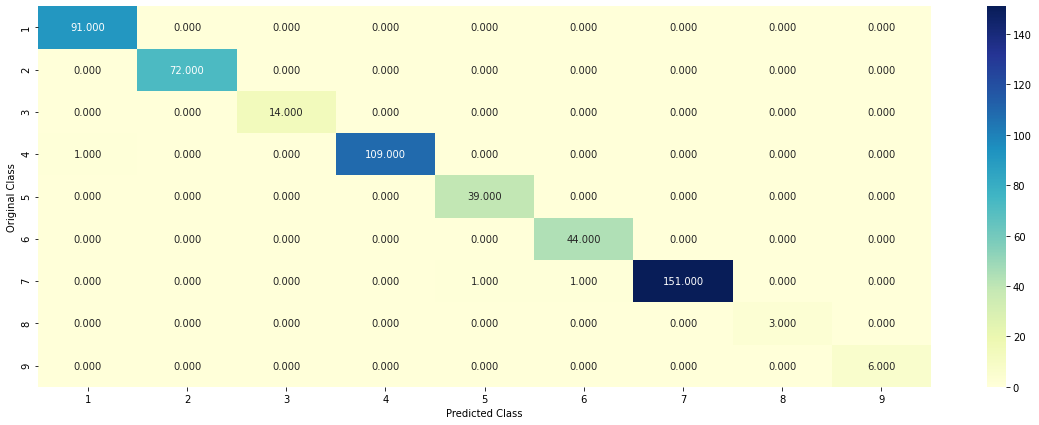

-------------------- Precision matrix (Columm Sum=1) --------------------


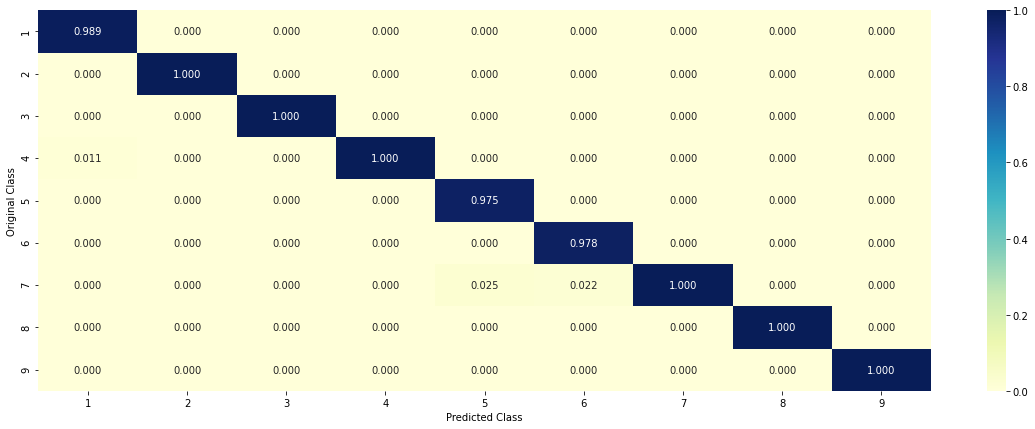

-------------------- Recall matrix (Row sum=1) --------------------


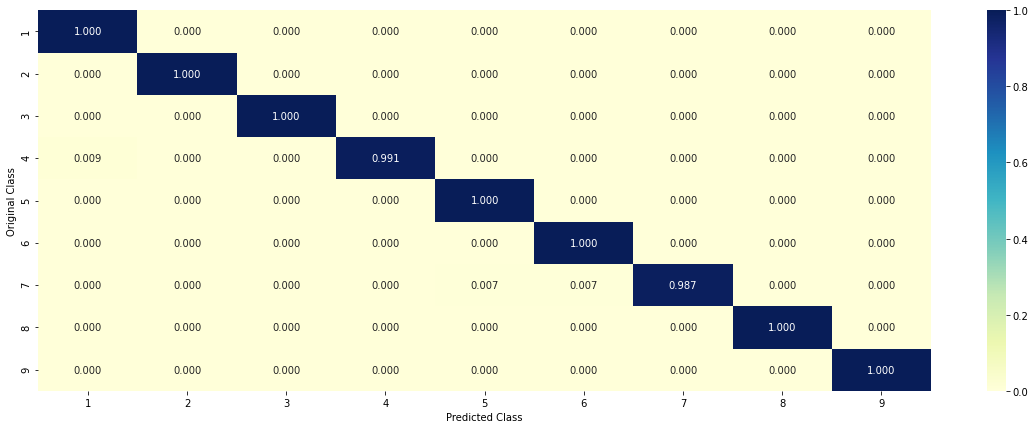

In [56]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1, class_weight='balanced')
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf, 1)
misclassified_percentage.append(missclassified_p*100)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [57]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1, -1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1, -1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.0049 0.0043 0.0024 0.9685 0.0038 0.006  0.0046 0.0026 0.0029]]
Actual Class : 4
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h4>4.5.3.2. Inorrectly Classified point</h4>

In [58]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1, -1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1, -1)),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.958  0.0046 0.0026 0.015  0.0033 0.005  0.0048 0.0028 0.004 ]]
Actuall Class : 1
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h3><font color='#235DA3'>XGBoost(With response coding)</font></h3>

In [59]:
from xgboost import XGBClassifier
alpha = [100, 500, 700]
max_depth =  [3, 6, 15,20]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
            print("for n_estimators =", i,"and max depth = ", j)
            clf = XGBClassifier(n_estimators=i, objective='multi:softmax' , max_depth=j, random_state=42, eval_metric='logloss')
            clf.fit(train_x_responseCoding, train_y)
            sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
            sig_clf.fit(train_x_responseCoding, train_y)
            sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
            cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
            print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = XGBClassifier(n_estimators=alpha[int(best_alpha/2)], objective='multi:softmax', max_depth=max_depth[int(best_alpha%2)], random_state=42, eval_metric='logloss')
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
xgboost_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",xgboost_tr)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
xgboost_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",xgboost_cv)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
xgboost_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",xgboost_te)

#For Summary
Model_name.append("XGBoost-RC")
train_losses_list.append(xgboost_tr)
cv_losses_list.append(xgboost_cv)
test_losses_list.append(xgboost_te)

for n_estimators = 100 and max depth =  3
Log Loss : 0.037639852377922195
for n_estimators = 100 and max depth =  6
Log Loss : 0.03985052191104355
for n_estimators = 100 and max depth =  15
Log Loss : 0.03985052191104355
for n_estimators = 100 and max depth =  20
Log Loss : 0.03985052191104355
for n_estimators = 500 and max depth =  3
Log Loss : 0.0370265322517812
for n_estimators = 500 and max depth =  6
Log Loss : 0.039792643095385175
for n_estimators = 500 and max depth =  15
Log Loss : 0.039792643095385175
for n_estimators = 500 and max depth =  20
Log Loss : 0.039792643095385175
for n_estimators = 700 and max depth =  3
Log Loss : 0.037081349319702694
for n_estimators = 700 and max depth =  6
Log Loss : 0.03988151764900683
for n_estimators = 700 and max depth =  15
Log Loss : 0.03988151764900683
for n_estimators = 700 and max depth =  20
Log Loss : 0.03988151764900683
For values of best estimator =  700 The train log loss is: 0.035812486676428584
For values of best estimator =  70

Log loss : 0.037081349319702694
Number of mis-classified points : 0.0037593984962406013
-------------------- Confusion matrix --------------------


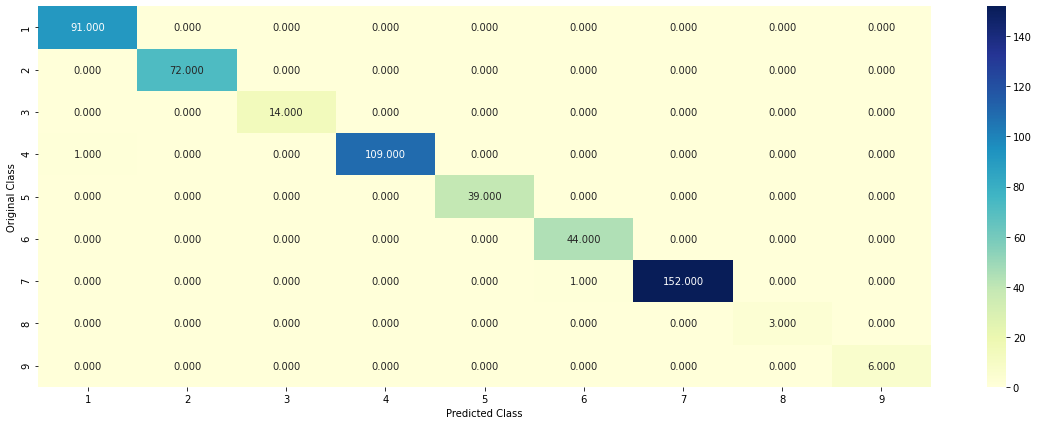

-------------------- Precision matrix (Columm Sum=1) --------------------


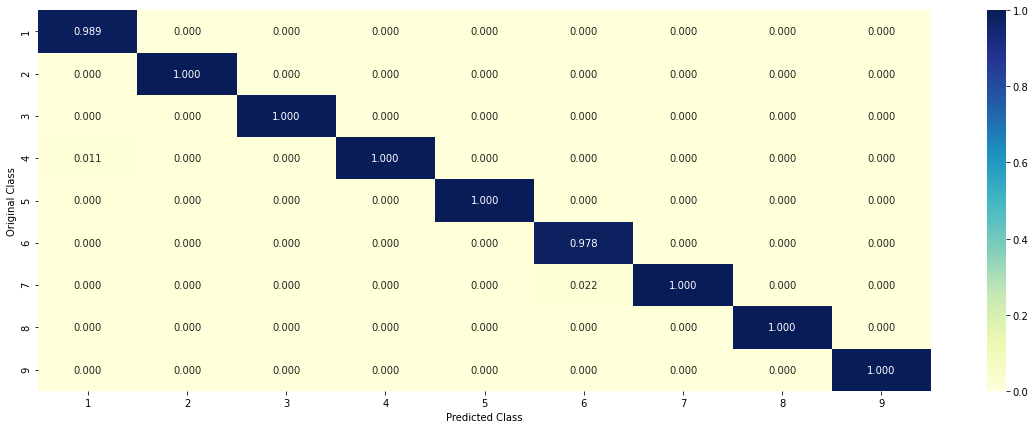

-------------------- Recall matrix (Row sum=1) --------------------


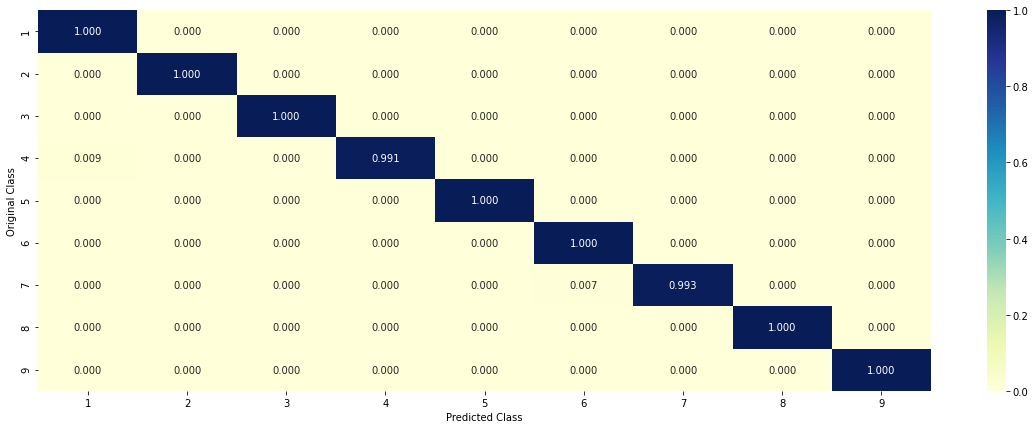

In [60]:
clf = XGBClassifier(n_estimators=alpha[int(best_alpha/2)], objective='multi:softmax', max_depth=max_depth[int(best_alpha%2)], random_state=42, eval_metric='logloss')
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf, 1)
misclassified_percentage.append(missclassified_p*100)

<h2><font color='#40B5C4'>Summary </font></h2>

In [61]:
from texttable import Texttable
#https://www.educative.io/edpresso/print-a-table-in-python
# texttable takes the first reocrd in the list as the column names
# of the table
l = [['Models', 'train_log_loss', 'cv_log_loss', 'test_log_loss', '%_misclassified']]
for i in range(len(Model_name)):
    new_record = []
    new_record.append(Model_name[i])
    new_record.append(train_losses_list[i])
    new_record.append(cv_losses_list[i])
    new_record.append(test_losses_list[i])
    new_record.append(misclassified_percentage[i])
    l.append(new_record)
    

# table = tabulate(l, headers=, tablefmt='orgtbl')


table = Texttable()
table.add_rows(l)
print(table.draw())

+----------------+---------------+-------------+---------------+---------------+
|     Models     | train_log_los | cv_log_loss | test_log_loss | %_misclassifi |
|                |       s       |             |               |      ed       |
+================+===============+=============+===============+===============+
| MultinomialNB- | 0.721         | 1.243       | 1.182         | 40.789        |
| OHE            |               |             |               |               |
+----------------+---------------+-------------+---------------+---------------+
| MultinomialNB- | 1.215         | 1.339       | 1.302         | 37.594        |
| RC             |               |             |               |               |
+----------------+---------------+-------------+---------------+---------------+
| KNN-OHE        | 0.870         | 1.185       | 1.110         | 41.165        |
+----------------+---------------+-------------+---------------+---------------+
| KNN-RC         | 0.450    